# ISS project 22/23

### Import libraries

In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

from IPython.display import Audio
from IPython.display import display

### Start parsing

In [2]:
MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2

howmanytones = MIDITO - MIDIFROM + 1
tones = np.arange(MIDIFROM, MIDITO+1)
s, Fs = sf.read('../audio/klavir.wav')      # Fs - signal frequence
N = int(Fs * HOWMUCH_SEC)
Nwholetone = int(Fs * WHOLETONE_SEC)        
xall = np.zeros((MIDITO+1, N))              # matrix with all tones - first signals empty
samplefrom = int(SKIP_SEC * Fs)
sampleto = samplefrom + N

x = s[samplefrom:sampleto]

for tone in tones:
    x = s[samplefrom:sampleto]              # some tone x
    x = x - np.mean(x)                      # safer to center
    xall[tone,:] = x                        # an array of all x tones
    samplefrom += Nwholetone
    sampleto += Nwholetone

## 1.1 Plot for *klavir3.wav* file

In [92]:
def draw(s, num, Fs=None, freq=None, **kwargs):
    plt.rcParams['font.size'] = 16
    
    fig = plt.figure(figsize=(24, 8))
    ax = fig.add_subplot(1, 1, 1)
    
    # <---------------signal----------------->
    if Fs != None:
        t = np.arange(s[num].size) / Fs
        
        ax.plot(t, s[num])
        ax.set_title("MIDI " + str(num))
        ax.set_xlabel("Time [s]")
        ax.set_ylabel("Amplitude")
        
        ax.set_xlim(min(t)-0.01, max(t)+0.01)
    
    # <----------------PSD------------------->
    else:
        ax.plot(freq, s)
        ax.set_title("Power Spectral Density of MIDI " + str(num))
        ax.set_xlabel("Frequency [Hz]")
        ax.set_ylabel("PSD")
        
        ax.set_ylim(-15, 5)
    
    ax.grid()
    plt.tight_layout()

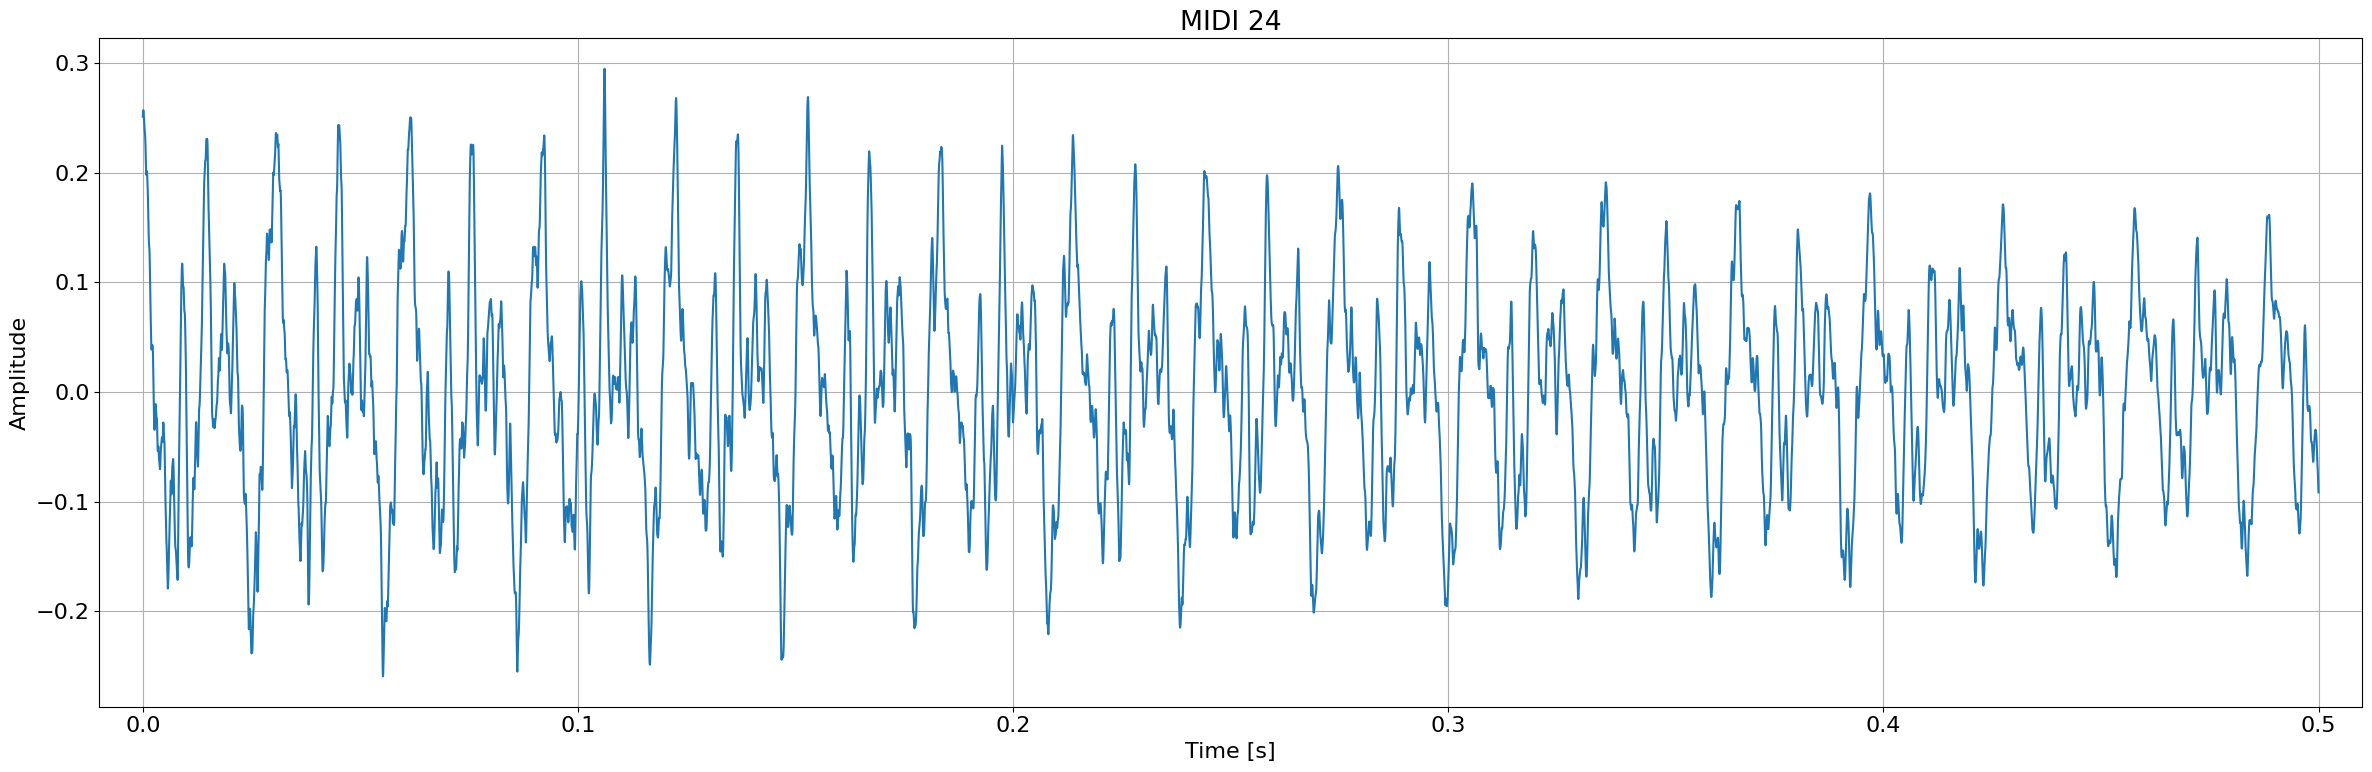

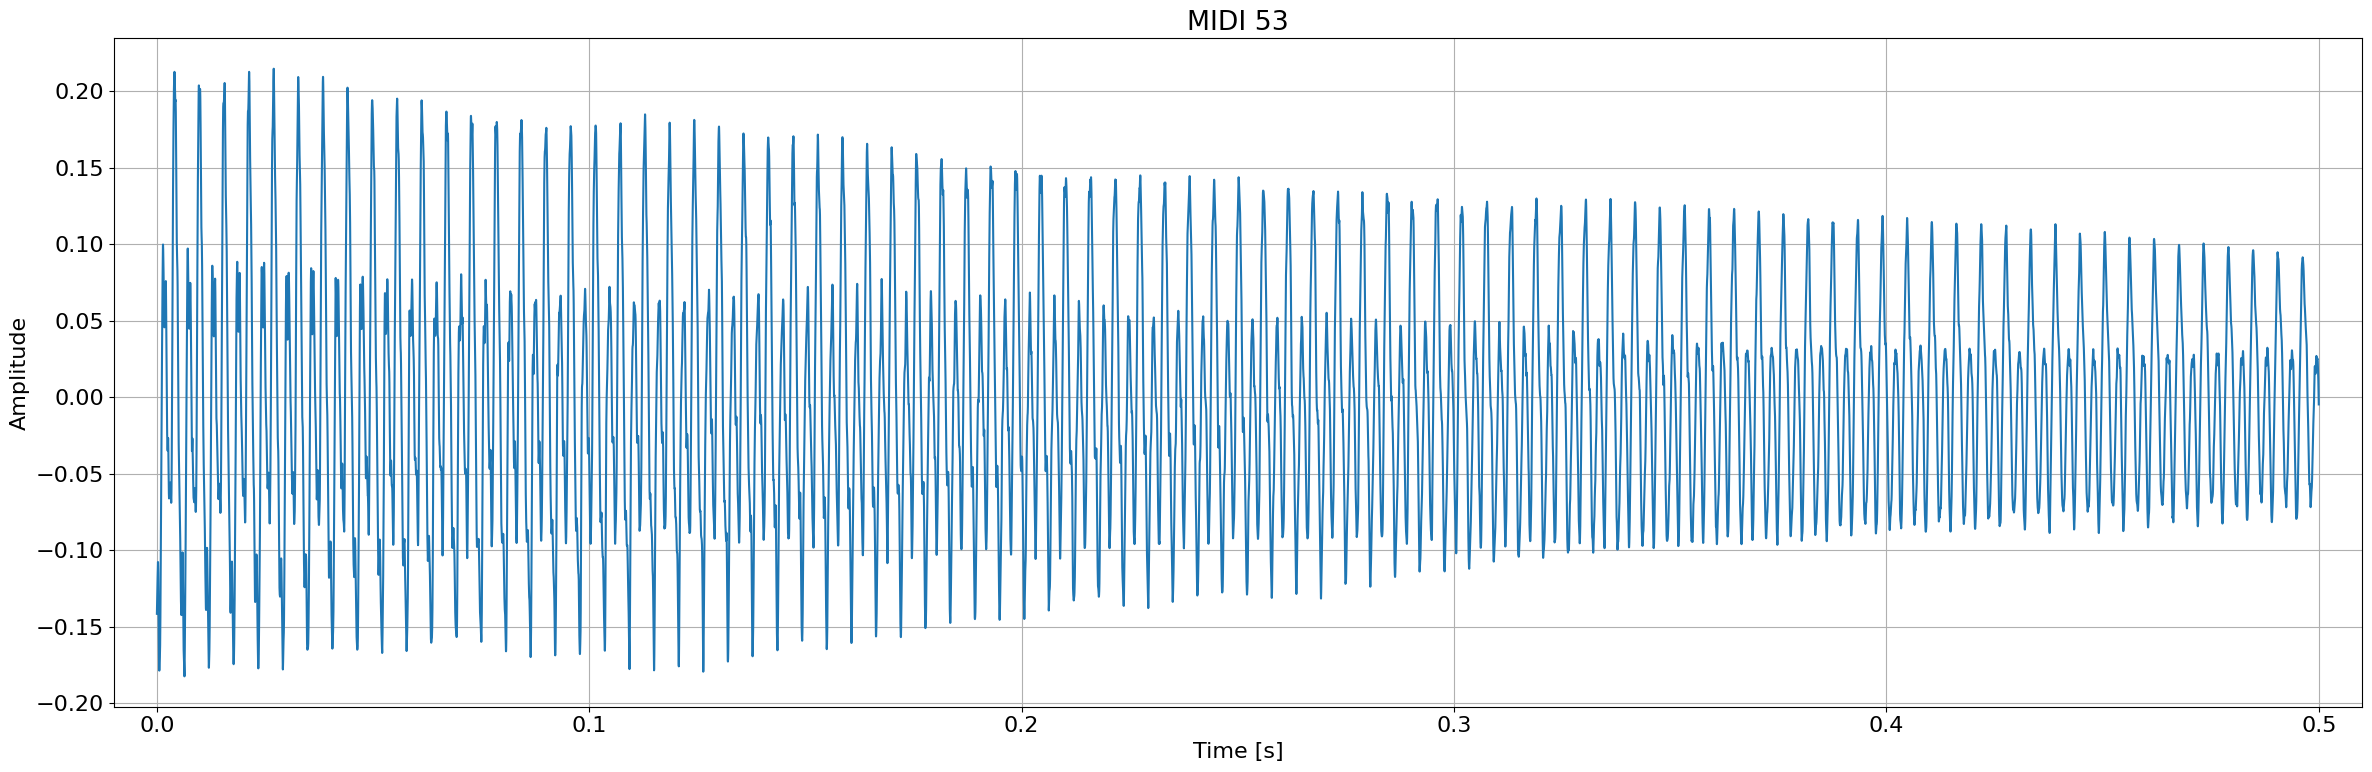

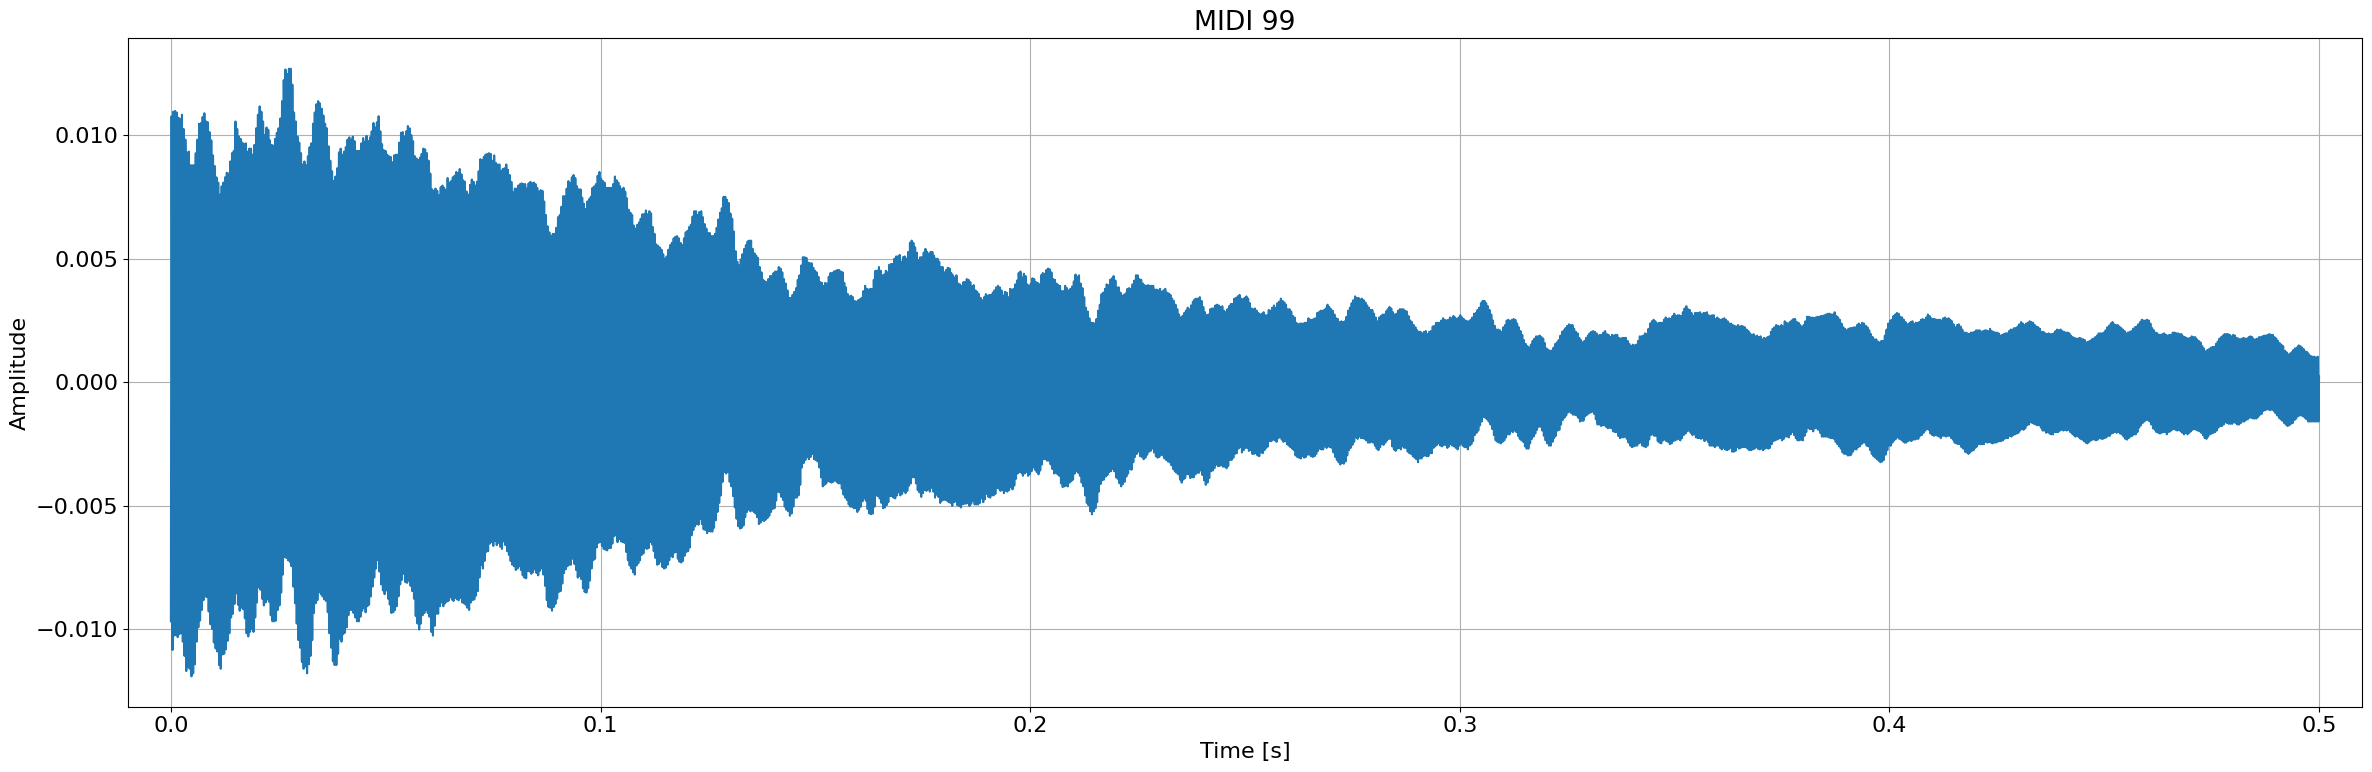

In [86]:
draw(xall, 24, Fs=Fs)
draw(xall, 53, Fs=Fs)
draw(xall, 99, Fs=Fs)

## 1.2 Save tones

In [5]:
display(Audio(xall[24], rate=Fs))
display(Audio(xall[53], rate=Fs))
display(Audio(xall[99], rate=Fs))

sf.write('../audio/a_orig.wav', xall[24], Fs)
sf.write('../audio/b_orig.wav', xall[53], Fs)
sf.write('../audio/c_orig.wav', xall[99], Fs)

## 2.1 Fundamental frequency definition with FFT (better than standard DFT)

This part will be shown with the help of PSD (Power Spectral Density): $\log \frac{|X[k]|^2}{N}$

In [79]:
N24 = xall[24].size

s24 = np.abs(np.fft.fft(xall[24]))              # get FFT and then take its modulo
half24 = s24[:s24.size // 2]                    # show only 0...N/2 part, because of symmetricity
PSD24 = np.log10((half24**2) / N24)
freq24 = np.arange(PSD24.size) * Fs / N24       # we should show the PSD with frequency of signal (25000) at graph
# <--------------------------------------->

N53 = xall[53].size

s53 = np.abs(np.fft.fft(xall[53]))
half53 = s53[:s53.size // 2]
PSD53 = np.log10((half53**2) / N53)
freq53 = np.arange(PSD53.size) * Fs / N53
# <--------------------------------------->

N99 = xall[99].size

s99 = np.abs(np.fft.fft(xall[99]))
half99 = s99[:s99.size // 2]
PSD99 = np.log10((half99**2) / N99)
freq99 = np.arange(PSD99.size) * Fs / N99
# <--------------------------------------->

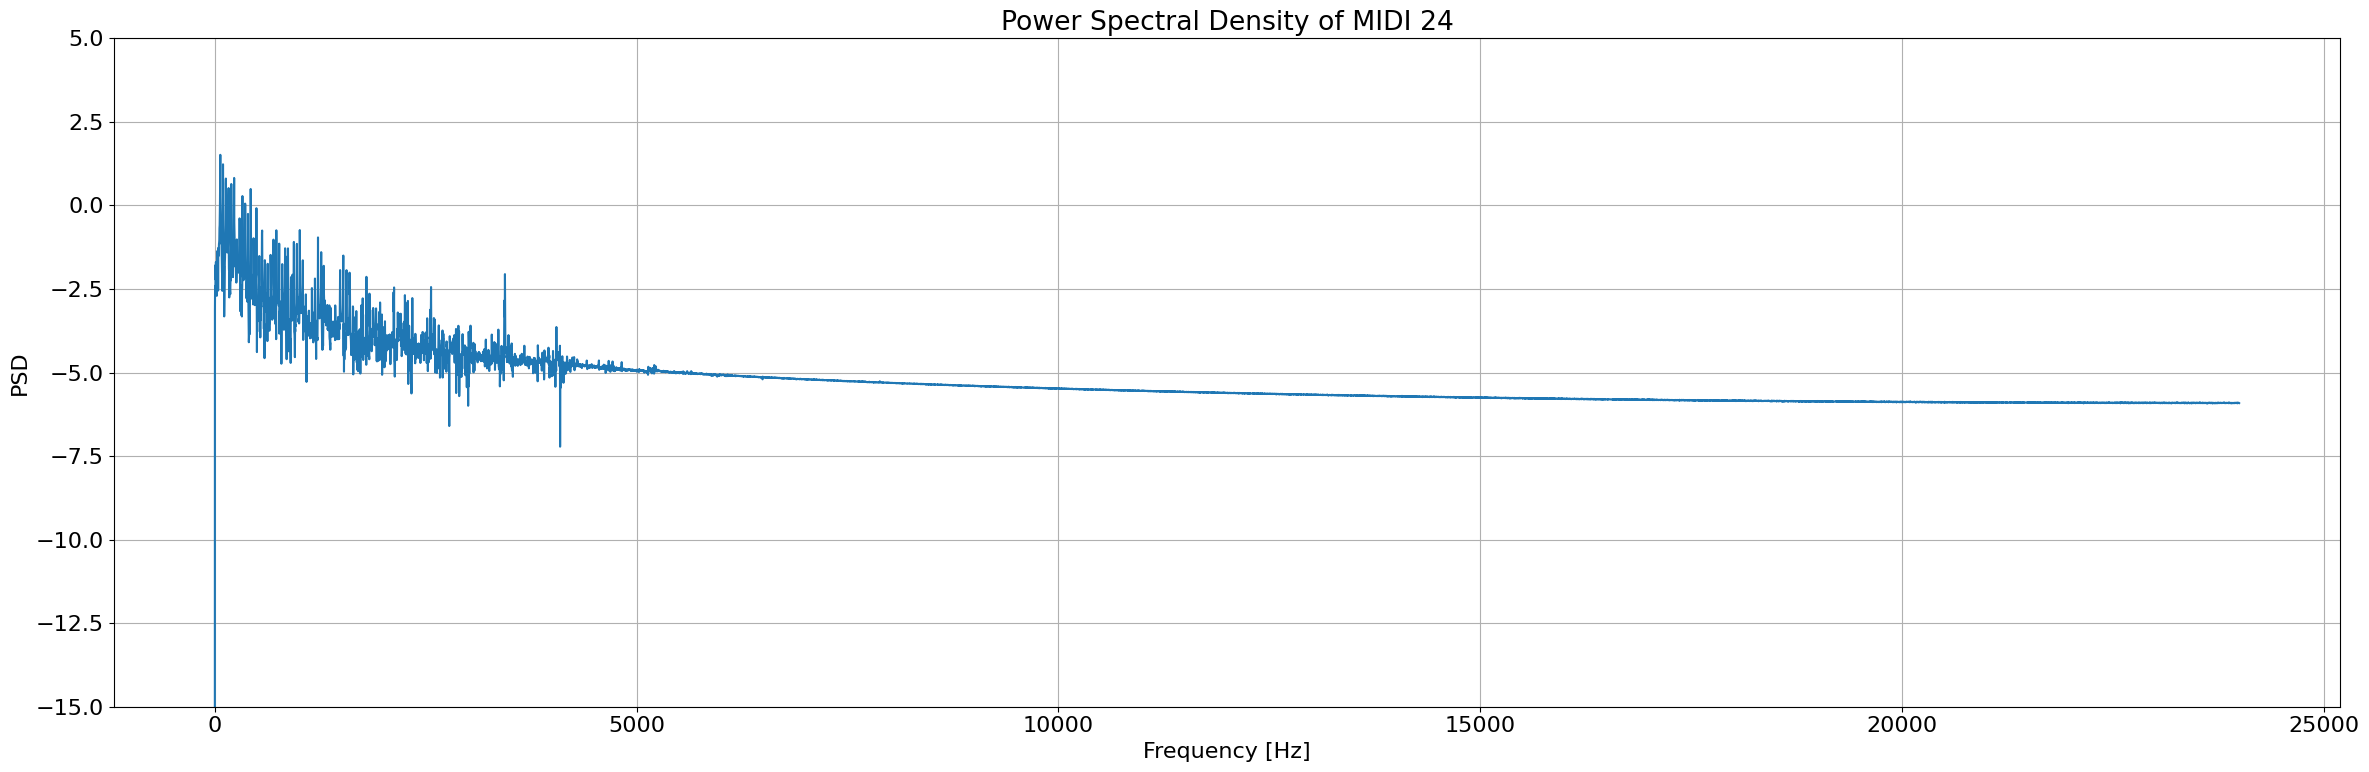

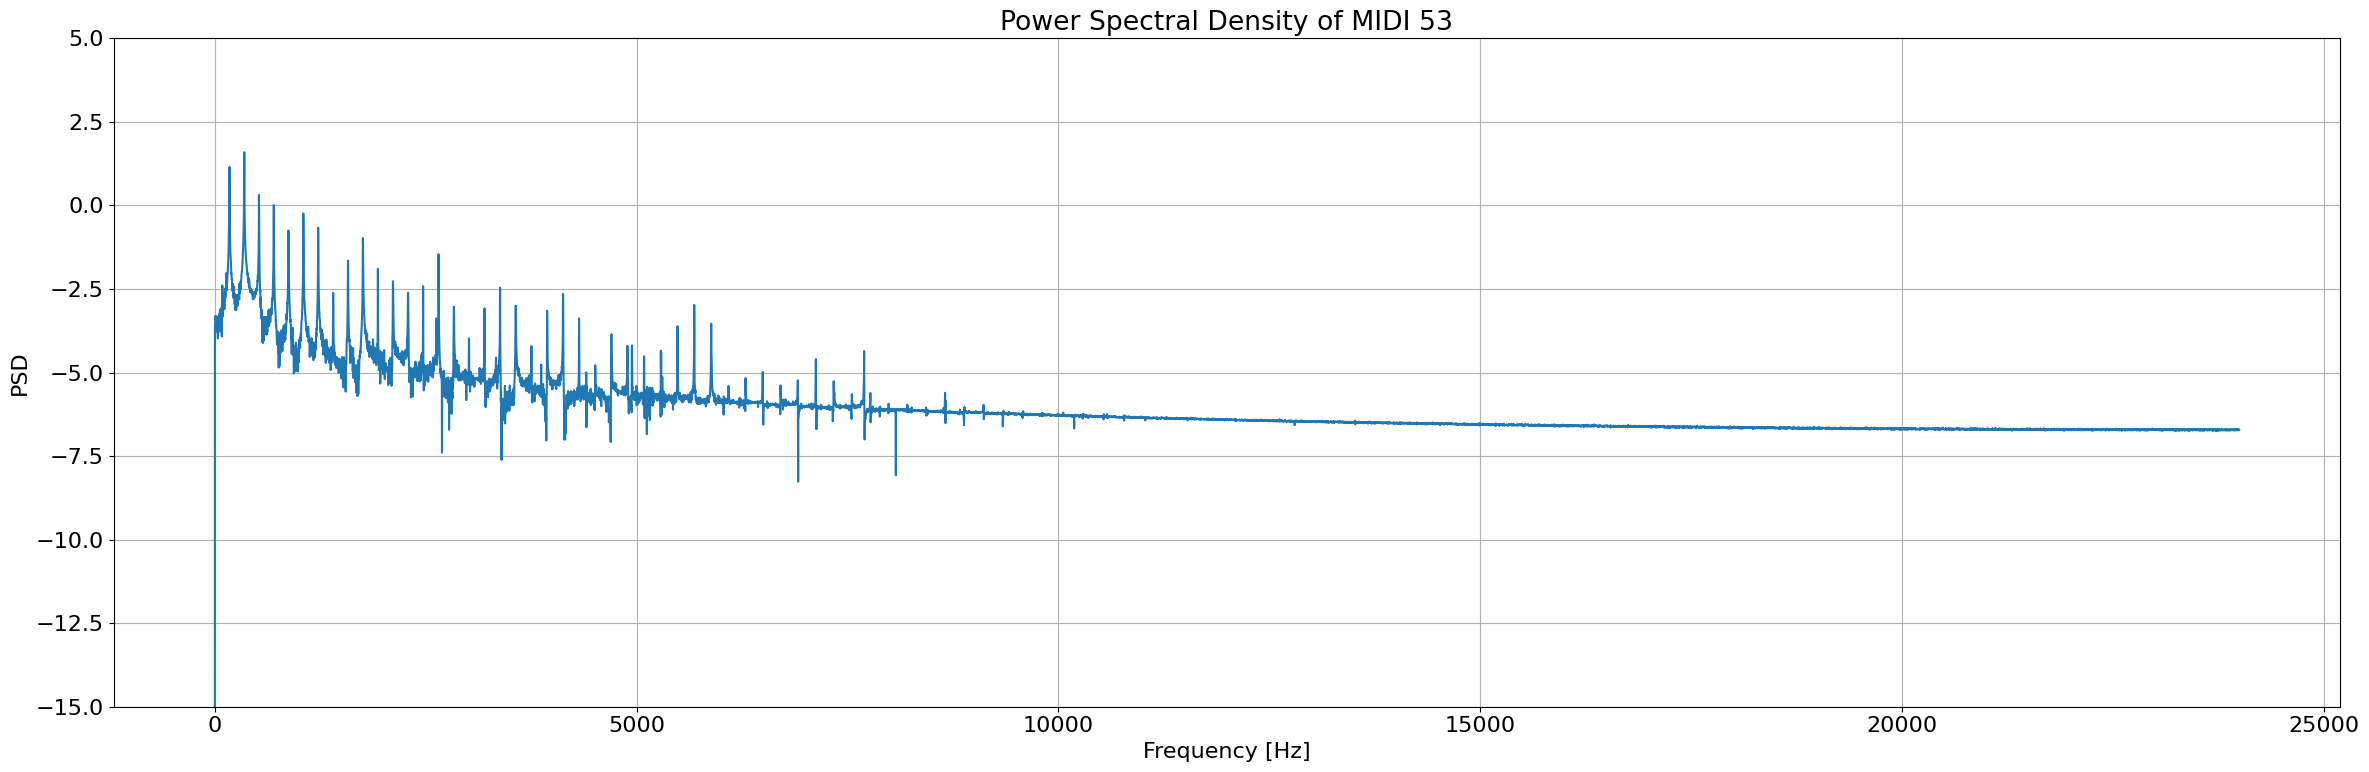

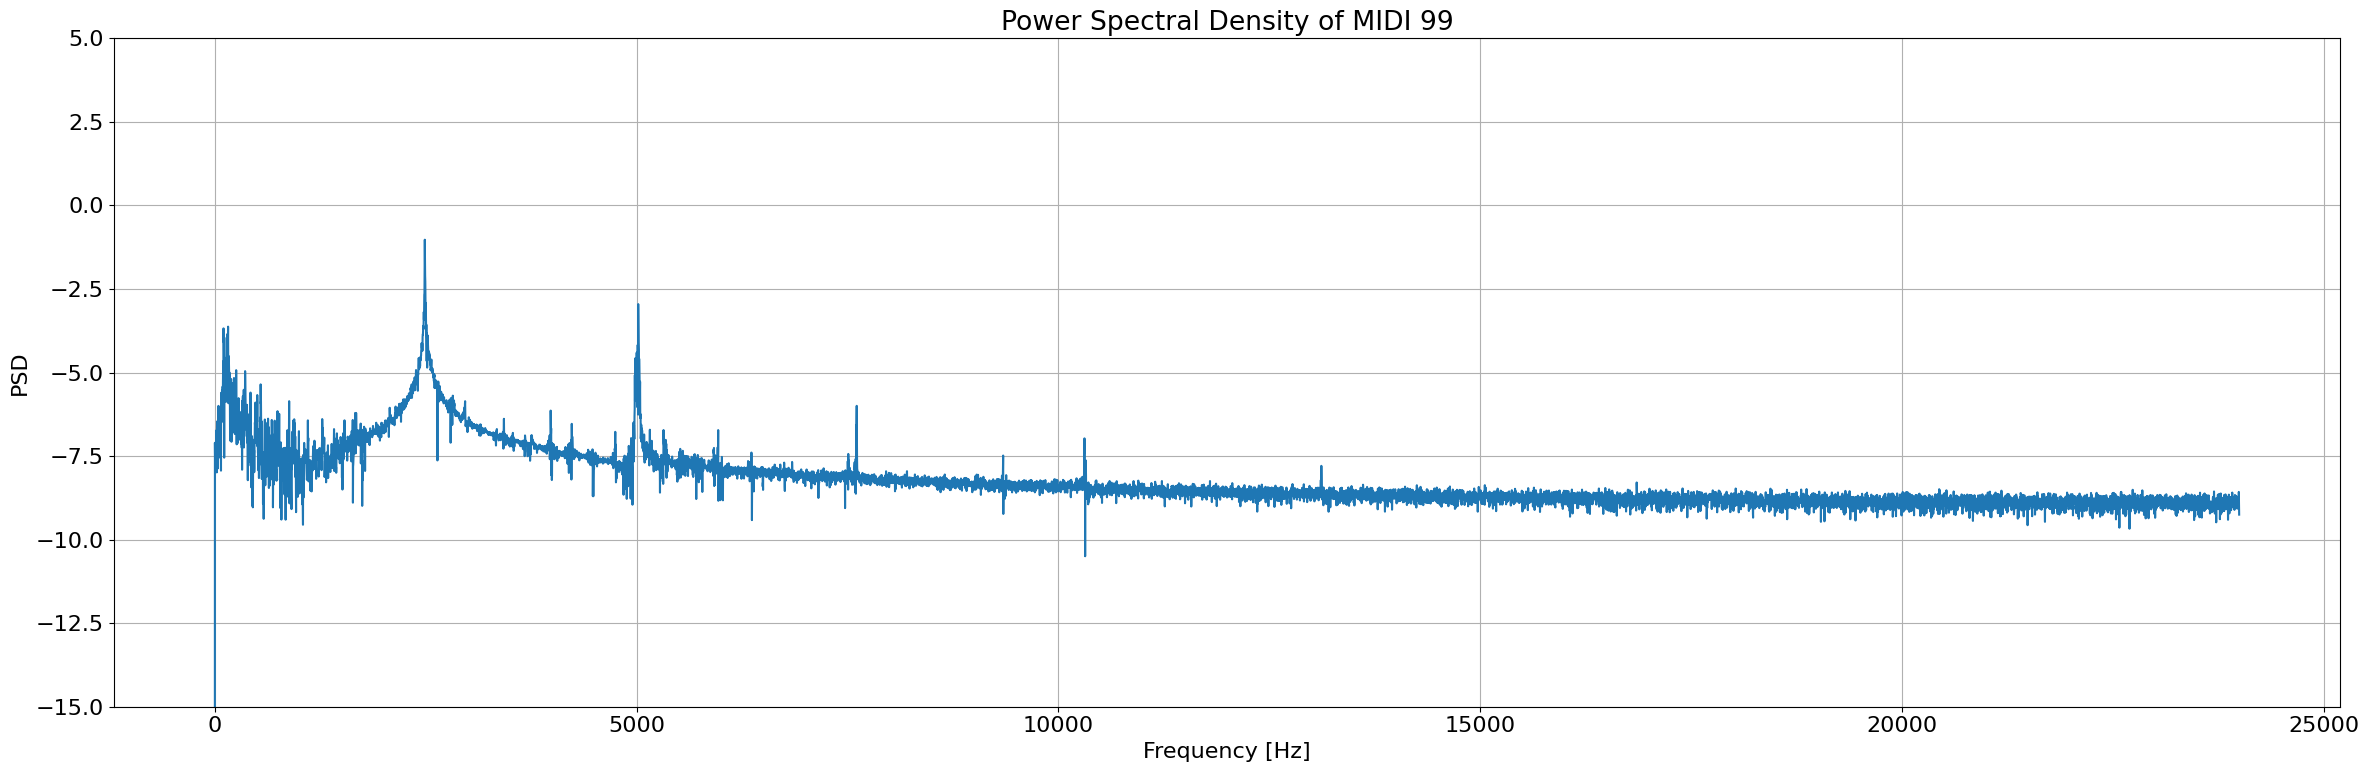

In [93]:
draw(PSD24, 24, freq=freq24)
draw(PSD53, 53, freq=freq53)
draw(PSD99, 99, freq=freq99)

<!-- Link on the next line contains values of F for each MIDI tone: </br>
https://www.fit.vutbr.cz/study/courses/ISS/public/proj2022-23/midi.txt
So for the reference: </br>
MIDI 24: F = 32.70 </br>
MIDI 53: F = 3174.61 </br>
MIDI 99: F = 2489.02 </br> -->